In [1]:
import cptac
import cptac.utils as u
import seaborn as sns
import matplotlib.pyplot as plt

/Users/hannahboekweg/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Load cancer data

In [2]:
en = cptac.Endometrial()
col = cptac.Colon()
br = cptac.Brca()

## Look at the cis effect of the PIK3CA genes

In [3]:
gene = 'PIK3CA'

## Prioritize hotspot mutations

In [4]:
endo = en.get_genotype_all_vars("PIK3CA", mutation_hotspot=["H1047R", 'E542K', 'E535K'])

cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 48 samples for the PIK3CA gene (/Users/hannahboekweg/anaconda3/lib/python3.7/site-packages/cptac/dataset.py, line 383)


## Pull out all the missense mutation and wildtype tumors 



In [5]:
missense = endo.loc[(endo['Mutation'] == "Missense_Mutation") | (endo['Mutation'] == "Wildtype_Tumor")]

In [6]:
missense

Name,Mutation,Location,Mutation_Status
Patient_ID,,,
C3L-00006,Missense_Mutation,p.E545K,Single_mutation
C3L-00008,Wildtype_Tumor,No_mutation,Wildtype_Tumor
C3L-00032,Missense_Mutation,p.E545K,Single_mutation
C3L-00090,Wildtype_Tumor,No_mutation,Wildtype_Tumor
C3L-00136,Wildtype_Tumor,No_mutation,Wildtype_Tumor
...,...,...,...
C3N-01510,Missense_Mutation,p.E545K,Single_mutation
C3N-01520,Missense_Mutation,p.E726K,Single_mutation
C3N-01537,Wildtype_Tumor,No_mutation,Wildtype_Tumor


# Now look at the cis effect for endometrial cancer 
(that is the difference in missense mutation between wildtype_tumor and missense_mutation)

In [7]:
#drop everything but the mutation column and join to proteomic data
missense = missense.drop(columns=['Location', 'Mutation_Status'])
prot = en.get_proteomics() #get proteomic data
missense[gene+'_proteomics'] = prot[gene]#filter for PIK3CA
endo_missense = missense
endo_missense

Name,Mutation,PIK3CA_proteomics
Patient_ID,,
C3L-00006,Missense_Mutation,-0.4500
C3L-00008,Wildtype_Tumor,-0.2150
C3L-00032,Missense_Mutation,-0.1780
C3L-00090,Wildtype_Tumor,-0.3920
C3L-00136,Wildtype_Tumor,-0.3490
...,...,...
C3N-01510,Missense_Mutation,-0.3730
C3N-01520,Missense_Mutation,-0.4860
C3N-01537,Wildtype_Tumor,-0.0312


# Cis effects for BRCA

In [28]:
#Prioritize hotspot mutations
brca = br.get_genotype_all_vars("PIK3CA", mutation_hotspot=["H1047R", 'E542K', 'E535K'])

cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 83 samples for the PIK3CA gene (/Users/hannahboekweg/anaconda3/lib/python3.7/site-packages/cptac/dataset.py, line 383)


In [31]:
#pull out all the missense mutation and wildtype tumors 
brca_missense = brca.loc[(brca['Mutation'] == "Missense_Mutation") | (brca['Mutation'] == "Wildtype_Tumor")]
brca_missense 

Name,Mutation,Location,Mutation_Status
Patient_ID,,,
CPT001846,Missense_Mutation,p.E542K,Multiple_mutation
X01BR001,Wildtype_Tumor,No_mutation,Wildtype_Tumor
X01BR008,Wildtype_Tumor,No_mutation,Wildtype_Tumor
X01BR020,Wildtype_Tumor,No_mutation,Wildtype_Tumor
X01BR023,Wildtype_Tumor,No_mutation,Wildtype_Tumor
...,...,...,...
X20BR008,Missense_Mutation,p.N345K,Single_mutation
X21BR002,Missense_Mutation,p.H1047R,Multiple_mutation
X21BR010,Missense_Mutation,p.H1047R,Multiple_mutation


In [30]:
#drop everything but the mutation column and join to proteomic data
brca_missense = brca_missense.drop(columns=['Location', 'Mutation_Status'])
prot = br.get_proteomics() #get proteomic data
prot
# brca_missense[gene+'_proteomics'] = prot[gene]#filter for PIK3CA
# brca_missense

Name,A1BG,A2M,A2ML1,AAAS,AACS,AADAT,AAED1,AAGAB,AAK1,AAMDC,...,ZSCAN31,ZSWIM8,ZW10,ZWILCH,ZWINT,ZXDC,ZYG11B,ZYX,ZZEF1,ZZZ3
Database_ID,NP_570602.2,NP_000005.2,NP_653271.2|NP_001269353.1,NP_056480.1|NP_001166937.1,NP_076417.2|NP_001306769.1|NP_001306768.1,NP_057312.1|NP_001273611.1,NP_714542.1,NP_078942.3|NP_001258815.1,NP_055726.3,NP_078960.1|NP_001303886.1|NP_001303887.1,...,NP_665916.1|NP_001230172.1|NP_116078.4|NP_001166148.1|NP_001229731.1|NP_001012458.1,NP_055852.2|NP_001229416.1|NP_001229417.1,NP_004715.1,NP_060445.3|NP_001274750.1,NP_008988.2|NP_001005413.1,NP_079388.3|NP_001035743.1,NP_078922.1,NP_001010972.1,NP_055928.3,NP_056349.1|NP_001295166.1
Patient_ID,,,,,,,,,,,,,,,,,,,,,
CPT000814,-0.6712,-0.2075,2.7959,1.3969,-1.0899,NaN,1.6708,-0.3484,-0.4756,-0.7299,...,-5.2868,-0.6536,0.3384,2.1169,1.3910,-2.1230,0.9136,-0.8082,-1.4793,0.9136
CPT001846,1.3964,1.3302,-5.0948,0.7674,-1.6845,NaN,2.1022,-0.5814,0.2916,-2.2857,...,-0.7592,0.4711,0.6018,0.2062,-0.2137,-2.1219,0.0860,2.5814,-0.2852,-0.1074
X01BR001,2.0219,1.6269,-3.2943,0.3352,-1.0739,1.2255,0.2754,-1.1187,-0.0534,-0.2519,...,NaN,0.2306,-0.3010,0.3395,-0.5316,NaN,0.4996,0.7622,-1.5607,0.0256
X01BR008,-0.5290,0.3267,1.4342,0.4938,-2.8676,NaN,NaN,-1.0691,-0.3643,-1.8173,...,-2.1789,0.2695,0.1506,1.0498,0.7546,1.7889,-0.2499,-0.2590,-0.1263,0.3725
X01BR009,1.2556,3.4489,2.8043,-0.2956,-1.7261,NaN,NaN,-2.0471,-0.3547,-0.8298,...,-2.3990,-0.2596,0.1898,-0.5010,-0.4189,0.3080,0.5057,0.2181,-0.2288,-0.2750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
X21BR001,-0.6610,-0.6402,-4.8578,1.2319,-1.6491,NaN,NaN,-0.3074,-0.3074,-0.0266,...,-0.2528,0.5090,0.0306,0.4908,-0.5570,2.3864,0.3764,-0.6974,1.3541,1.1123
X21BR002,-1.3735,0.4227,-4.9553,0.6327,-3.1434,NaN,NaN,0.3071,0.7562,-1.6912,...,-3.3351,0.1548,1.0792,-0.6619,-1.4444,-0.3704,0.4909,0.3938,0.2992,-0.3494


# Cis effect for Colon

In [11]:
#Prioritize hotspot mutations
colon = col.get_genotype_all_vars("PIK3CA", mutation_hotspot=["H1047R", 'E542K', 'E535K'])

cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 82 samples for the PIK3CA gene (/Users/hannahboekweg/anaconda3/lib/python3.7/site-packages/cptac/dataset.py, line 383)
cptac warning: CNV data was not found for the following samples, so CNV data columns were filled with NaN for these samples: 05CO045 (/Users/hannahboekweg/anaconda3/lib/python3.7/site-packages/cptac/dataset.py, line 383)


In [12]:
colon['Mutation'].unique()

array(['Wildtype_Tumor', 'Amplification', 'nonframeshift substitution',
       'nonsynonymous SNV', 'Deletion', 'nonsynonymous SNV_hotspot',
       'frameshift substitution'], dtype=object)

In [13]:
#pull out all the missense mutation and wildtype tumors 
colon_missense = colon.loc[(colon['Mutation'] == "nonsynonymous SNV") | (colon['Mutation'] == "Wildtype_Tumor")]

In [14]:
#drop everything but the mutation column and join to proteomic data
colon_missense = colon_missense.drop(columns=['Location', 'Mutation_Status'])
prot = col.get_proteomics() #get proteomic data
colon_missense[gene+'_proteomics'] = prot[gene]#filter for PIK3CA
colon_missense

Name,Mutation,PIK3CA_proteomics
Patient_ID,,
01CO001,Wildtype_Tumor,NaN
01CO005,Wildtype_Tumor,NaN
01CO006,Wildtype_Tumor,-0.515
01CO013,Wildtype_Tumor,0.106
01CO015,Wildtype_Tumor,-0.687
...,...,...
20CO007,nonsynonymous SNV,-0.245
22CO004,Wildtype_Tumor,-0.817
22CO006,Wildtype_Tumor,0.177


# Final Graph

In [15]:
endo_missense = endo_missense.assign(cancer = 'Endometrial')
brca_missense = brca_missense.assign(cancer = 'Brca')
colon_missense = colon_missense.assign(cancer = 'Colon')


In [36]:
endo_missense.head()

Name,Mutation,PIK3CA_proteomics,cancer
Patient_ID,,,
C3L-00006,Missense_Mutation,-0.450,Endometrial
C3L-00008,Wildtype_Tumor,-0.215,Endometrial
C3L-00032,Missense_Mutation,-0.178,Endometrial
C3L-00090,Wildtype_Tumor,-0.392,Endometrial
C3L-00136,Wildtype_Tumor,-0.349,Endometrial


In [35]:
brca_missense.head()

Name,Mutation,Location,Mutation_Status
Patient_ID,,,
CPT001846,Missense_Mutation,p.E542K,Multiple_mutation
X01BR001,Wildtype_Tumor,No_mutation,Wildtype_Tumor
X01BR008,Wildtype_Tumor,No_mutation,Wildtype_Tumor
X01BR020,Wildtype_Tumor,No_mutation,Wildtype_Tumor
X01BR023,Wildtype_Tumor,No_mutation,Wildtype_Tumor


In [34]:
colon_missense.head()

Name,Mutation,PIK3CA_proteomics,cancer
Patient_ID,,,
01CO001,Wildtype_Tumor,NaN,Colon
01CO005,Wildtype_Tumor,NaN,Colon
01CO006,Wildtype_Tumor,-0.515,Colon
01CO013,Wildtype_Tumor,0.106,Colon
01CO015,Wildtype_Tumor,-0.687,Colon


In [16]:
df = endo_missense.append(brca_missense)
df = df.append(colon_missense)

df

Name,Mutation,PIK3CA_proteomics,cancer
Patient_ID,,,
C3L-00006,Missense_Mutation,-0.450,Endometrial
C3L-00008,Wildtype_Tumor,-0.215,Endometrial
C3L-00032,Missense_Mutation,-0.178,Endometrial
C3L-00090,Wildtype_Tumor,-0.392,Endometrial
C3L-00136,Wildtype_Tumor,-0.349,Endometrial
...,...,...,...
20CO007,nonsynonymous SNV,-0.245,Colon
22CO004,Wildtype_Tumor,-0.817,Colon
22CO006,Wildtype_Tumor,0.177,Colon


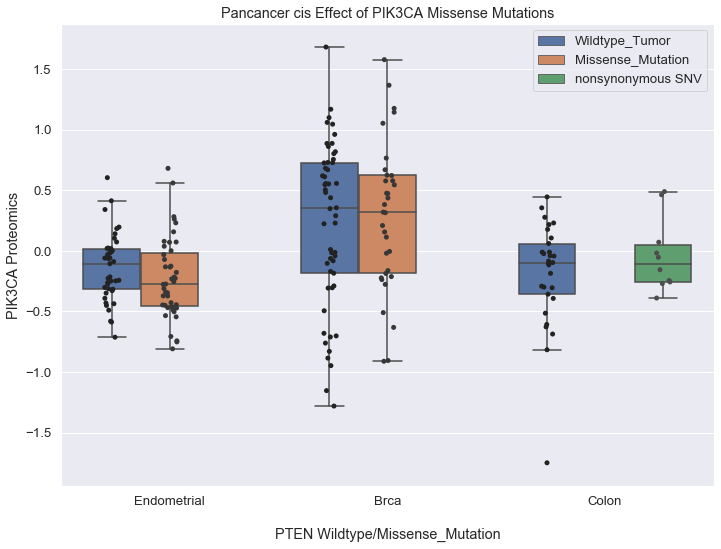

In [17]:
# pancancer cis plot
gene = 'PIK3CA'
plt.rcParams['figure.figsize']=(11.7,8.5) #size of plot
sns.set(font_scale = 1.2)

boxplot = sns.boxplot(x='cancer', y=gene+"_proteomics", data = df, hue = 'Mutation',
                      hue_order = ["Wildtype_Tumor", "Missense_Mutation","nonsynonymous SNV"], showfliers = False)    
boxplot.set_title('Pancancer cis Effect of PIK3CA Missense Mutations')
boxplot = sns.stripplot(x='cancer', y=gene+"_proteomics", data = df, jitter = True, 
                           color = ".3", hue = 'Mutation', hue_order = ["Wildtype_Tumor", "Missense_Mutation", 'nonsynonymous SNV'], dodge = True)
boxplot.set(xlabel = "\nPTEN Wildtype/Missense_Mutation", ylabel = gene+' Proteomics')

# format legend
handles, labels = boxplot.get_legend_handles_labels()
plt.legend(handles[0:3], labels[0:3])



plt.show()
plt.clf()
plt.close()

In [18]:
fig = boxplot.get_figure()
fig.savefig("cis_effects_proteomics.png")